# Fractals in python

#### Adapted from *The Nature of Code* by Daniel Shiffman
Copyright © 2012 by Daniel Shiffman

## What are fractals?
The term fractal (from the Latin fractus, meaning “broken”) was coined by the mathematician Benoit Mandelbrot in 1975. In his seminal work “The Fractal Geometry of Nature,” he defines a fractal as “a rough or fragmented geometric shape that can be split into parts, each of which is (at least approximately) a reduced-size copy of the whole.”

As we will see, fractals often describe or at least resemble objects in nature, such as trees, mountain ranges, snowflakes, coastlines, blood vessels, lightning bolts, and so on.

The mathematical definition of a fractal is rather complex, and we will not worry about it for now. Instead, we will focus on a defining feature of fractals, their *self-similarity*, and how this manifests when we write programs to create factals.

Lets start with a normal geometric shape, say a circle or a square. If we zoom in to a part of these shapes, we get a straight or curved line:

<img src="not_fractal.png" width="500">

The zoomed pictures obviously do not resemble the full shapes, thus these simple examples are not self-similar, and not fractals.

So what would a simple fractal look like? Say we define an algorithm to make a tree. This agorithm involves drawing a "root" (straight line) with two "branches" coming off at angles from the end. Each one of these branches has its own two branches, and so on. If we draw a picture of this and zoom in we see something like this:

<img src="ch08_04.png">

Looking closely at any branch gives something that looks like the tree itself. Therefore, this geometric construction is *self-similar*!

In the simple case of the tree, you could imagine from the definition of how to draw the shape that it would look like a fractal. But it does not need to be so exact and straightforward. In the real world, most fractals are *stochastic* fractals, which means that they are built out of probabilities and randomness. They are not exactly self-similar, but still have *scale-invarience*: zooming in on the image produces an image with the same type of features, such that you could not tell how much it was zoomed without a scale included. 

A simple example of this is the fluctuations in a stock's price. Consider the following data for Google's stock price: 

<img src="stocks_google_2.png" width="500">

The top curve is for six hours and the bottom is for six months. Other than maybe the number of data points, the fluctuations are both about the same. You could not tell which one was for a shorter or longer time without a scale bar. The same fluctuations would occur for a decade or a minute if we had dense enough data.

***Note: While self-simularity is a key trait of a fractal, anything that is self-similar is not necessarily a fractal. For example, a straight line is self-similar, but does not have the fine structure at all scales, and therefore is not a fractal.***

## How do we create fractals with a computer?

As you saw for the example of the tree, a key concept for programming fractals is creating a pattern of *recursion*, or repeating a rule to the results of the previous application of the rule. In the tree example, we split each line into to, and then each of those lines into two, and each of those lines into two, and so on.

How do we acheive recursion in a program? It's quite simple. Before you learned about defining and calling functions in python. Also, functions may call other functions, and you also saw that we can write a function that *calls itself*? It seems strange at first but lets try a simple example. 

We will write a program with the following rules:

1. Draw a circle
2. Draw circles to the right and left of the previous circle that are half the size of the circle from step one.
3. Draw circles to the right and left of the two circles drawn in step 2, that are half the size of those circles.
4. Iterate until the circles we are drawing are sufficiently small.

To do this, we will use the Turtle drawing package that you learned about previously:

In [26]:
import turtle

# This function will draw circles of a given radius and position
# on the x axis.
def Draw_Circle(radius,x_pos):
    turtle.speed(0) # fast because we are impaitent! 
    turtle.penup() # lift the pen to get in position
    turtle.setpos(x_pos,-radius) # get in position to draw circle
    turtle.pendown() # now we draw
    turtle.circle(radius) # make a circle with a given radius
    turtle.penup() # lift pen to get to next position
    turtle.setpos(x_pos,radius) # get in position for the next circle

    # limits the size of the circle drawn, or else it will go on forever!
    if radius > 2:
        # Recursivly call the present function for the circle to the right
        Draw_Circle(radius/2,x_pos+radius) 
        # Recursivly call the present function for the circle to the left
        Draw_Circle(radius/2,x_pos-radius)

#----------                                                                                                                                           

# Start with a circle of radius 80
Draw_Circle(80,0)
turtle.done() # leave the figure on the screen until we close the window

We obtain something that looks like this:

<img src="circles.png" width="400">

which already looking a bit fractal! Note that the program only recurs until the circle radius is smaller than 2. ***NOTE: There always needs to be a stopping condition for a recursive function, or it will continue forever!!***
We can mess around with the initial radius and the stopping conditions to get more or less circles. 

Ok, now let's go one step further and draw circles not only to the right and left, but also above and below the original circle:

In [33]:
import turtle

# Similar to the function Draw_Circle, but with recursion in the x and
# y directions
def Draw_Circle_twoD(radius,x_pos,y_pos):
    
    # This is basically the same as the function Draw_Circle
    # except now we must change the y position also
    turtle.speed(0)
    turtle.penup()
    turtle.setpos(x_pos,-radius+y_pos)
    turtle.pendown()
    turtle.circle(radius)
    turtle.penup()
    turtle.setpos(x_pos,radius+y_pos)

    # Larger stopping conduition as before: when circles get smaller than 10
    if radius > 10:
        # We now have four recursive calls to the function
        Draw_Circle_twoD(radius/2,x_pos+radius,y_pos)
        Draw_Circle_twoD(radius/2,x_pos-radius,y_pos)
        Draw_Circle_twoD(radius/2,x_pos,y_pos+radius)
        Draw_Circle_twoD(radius/2,x_pos,y_pos-radius)


#----------                                                                                                                                           

# Now we specify an initial x and y position
Draw_Circle_twoD(80,0,0)
turtle.done()

Again, we can mess around with the original radius and the stopping criteria to get more or less circles. Even with a fast turtle, it takes quite a while! Worth the wait, thought as the pattern is awesome. Here it is for circles starting with a radius of 80 and going to 2:

<img src="circles_2.png" width="400">


That is *a lot* of circles! However, the code is still modest thanks to the power of recusion. This is one of the interesting aspects of fractals, and why they are so powerful for describing things in nature: relatively simple rules repeated over and over can generate complex patterns.


## Some common fractal patterns

Now that we have the basic tool of recursion, lets study and plot some common fractal patterns.

### Koch Curve

One of the most recognizable fractal patters is the Koch curve. The rules for this type of fractal can be written as such:

<img src="Koch_Curve_des.png" width="600">

We again implement this using turtle and a recursive function. Our specific algorith is a bit different that the steps written above, since we are drawing from right to left, but we can clearly see how changing the "depth" adds more triangles to each straight segment of the curve:

In [21]:
import turtle 
from time import sleep  # we will use this so we have time to look at the curves

# This function will execute the rules above. We can specify the 
# length of each segment, and the depth, or how many times we will
# repeat the rules.
def Recursive_Koch(length,depth):

    # Depth of 0 is just a straight line
    if depth == 0:
        turtle.forward(length)
    
    # For other depths, we start drawing triangles recursively
    else:
        Recursive_Koch(length,depth-1)
        turtle.right(60)
        Recursive_Koch(length,depth-1)
        turtle.left(120)
        Recursive_Koch(length,depth-1)
        turtle.right(60)
        Recursive_Koch(length,depth-1)
        
#---------                                                                                                                                   

# Just some setup to get the turtle in a good spot
turtle.right(180)
turtle.penup() 
turtle.backward(250)
turtle.speed(10)

# We will draw curves for depths from 1 to 6 on top of each other to
# see how the pattern is built up
for depth in range(1,6):
    turtle.pendown()
    
    # our length depends of depth so the patterns lay on top of each other
    length=500/3**depth

    # Call the function
    Recursive_Koch(length,depth)

    turtle.penup()
    turtle.backward(500)
    
    sleep(3) # Pause for a breath!
turtle.done()

We already have something that looks vaguely "natural." Maybe like some coral, or something. Lets mess around with this a bit. What if we were to add a small randomness to the angle (and repeat it several times:

In [23]:
import turtle
import random # So we can generate random numbers

# Same as before, but with a bit of randomness in the angles away from 60
# and 120 degrees
def Recursive_Koch_Rand(length,depth):

    if depth == 0:
        turtle.forward(length)

    else:
        Recursive_Koch_Rand(length,depth-1)
        turtle.right(60+(random.random()-0.5)*10)
        Recursive_Koch_Rand(length,depth-1)
        turtle.left(120+(random.random()-0.5)*10)
        Recursive_Koch_Rand(length,depth-1)
        turtle.right(60+(random.random()-0.5)*10)
        Recursive_Koch_Rand(length,depth-1)
        
#---------                                                                                                                                   

# Setup the turtle
turtle.speed(0)
turtle.penup()
turtle.right(180)
turtle.backward(250)

# Now we fix the depth
depth=6
length=500/3**depth
turtle.pendown()

# Just repeat three times
for z in range(2):
    Recursive_Koch_Rand(length,depth)
                                                                                                                               

turtle.done()

And off it goes, meandering around. If we blur our eyes a bit, it kind of looks like a coastline viewed from space.

<img src="Koch_coast_2.png">

Coastlines and the Koch curve also share a very strange property, known as the *coastline paradox*. Say we want to measure the overall length of the Koch curve. Since we have only been dealing with finite "depth" versions, we can take out a ruler and measure it. But, in principle, to actually be self-similar the true fractal has infinite depth, so the more you zoom in, the more triangles you see on each line segment. Thus the more you zoom *the longer the curve you measure*. Since a coastline is also truly fractal, the same issue appears in cartography! The more acuratly you try to measure the length of a coastline, by zooming in more and more, the result just becomes longer and longer as you follow the smaller and smaller featuers of the coast. 

In fact, it is theorized that the infinite length of a fractal coastline makes it the most stable to erosion caused by ocean waves:

<img src="coast_paper.png" width="700">

### Fractal tree

Ok, lets return to the first example we looked at, the fractal tree. In the same way as we have done before, we write a recursive function using turtle to create such a tree:


In [25]:
import turtle

# The function will execute the rules to make a tree. A line is drawn,
# and then three branches are made. Two branches are made at the end of
# thoise branches, and so on
def Tree(length,n):
    if length<(length/n):
        return
    
    # Need some extra lines to get the turtle in the right place
    turtle.forward(length)
    turtle.left(45)
    Tree(length*0.5,length/n) # First branch recursive call
    turtle.right(90)
    Tree(length*0.5,length/n) # Second branch recursive call
    turtle.left(45)
    Tree(length*0.5,length/n) # Third Second branch recursive call
    turtle.backward(length)
    return

#---------                                                                                                                                   

# Setup the turtle
turtle.speed(0)
turtle.left(90)                                                                                                                             
turtle.backward(100)

# Now call the function with an initial line length of 200 and a depth of 4
Tree(200,4)                                                                                                                                 

turtle.done()

Kind of cool looking, but is looks too symmetric to be a tree in the forest. We can make it look a little more "natural" if we change the angles a bit so it is not so uniform:

In [18]:
import turtle

# Same as before, but with some different angles
def Tree_Diff_Angles(length,n):
    if length < (length/n):
        return
    turtle.forward(length)
    turtle.left(45)
    Tree_Diff_Angles(length*0.5,length/n)
    turtle.left(20)
    Tree_Diff_Angles(length*0.5,length/n)
    turtle.right(75)
    Tree_Diff_Angles(length*0.5,length/n)
    turtle.right(20)
    Tree_Diff_Angles(length*0.5,length/n)
    turtle.left(30)
    turtle.backward(length)
    return

#---------                                                                                                                                   

# Setup the turtle
turtle.speed(0)
turtle.left(90)                                                                                                                             
turtle.backward(100)                                                                                                                         

# Call the function
Tree_Diff_Angles(200,3)                                                                                                                                 

turtle.done()

As before, we can make things even more "natural" if we add some randomness to the fractal via the angles, and make the width of the lines proportional to their length like we would expect for branches:

In [ ]:
import turtle
import random # To get random numbers

# Same as Tree_Diff_Angles, but with a bit of randomness
def Tree_Random(length,n):
    
    turtle.pensize(length/20)
    
    if length < (length/n):
        return
    turtle.forward(length)
    
    # Here we generate two random numbers
    random_angle_1=(random.random()-0.5)*20
    random_angle_2=(random.random()-0.5)*20
    
    # We have to be a bit careful about how we apply the randomness
    # so the turtle makes it back to the previous branch
    turtle.left(45+random_angle_1)
    Tree_Random(length*0.5,length/n)
    turtle.left(20+random_angle_2)
    Tree_Random(length*0.5,length/n)
    turtle.right(75+random_angle_1+random_angle_2)
    Tree_Random(length*0.5,length/n)
    turtle.right(20+random_angle_1)
    Tree_Random(length*0.5,length/n)
    turtle.left(30+random_angle_1)
    turtle.backward(length)
    return

#---------                                                                                                                                   

# Setup the turtle
turtle.speed(0)
turtle.left(90)                                                                                                                             
turtle.backward(100)   

# Lets make the tree!
Tree_Random(200,4)                                                                                                                                 

turtle.done()

### Sierpinski Triangle

Another common fractal patern is the Sierpinski Triangle. There are a few different ways to think about how to make this fractal. We  begin with an equilateral triangle. then we connect the midpoints of the edges of the triangle, breaking the triangle up into four smaller equilateral triangles. We do the same for the outer triangles, resulting in more equilaterial triangles, and so on. Anyway, it is not so easy to describe in words so lets just generate one to see:

In [23]:
# Credits: This code was written by editing the code from http://www.lpb-riannetrujillo.com/blog/python-fractal/

import turtle as turtle

# This function takes in two points and finds the midpoint
def getMid(p1,p2):
    return ( (p1[0]+p2[0]) / 2, (p1[1] + p2[1]) / 2) 

# This function draws triangles, and will be used recursively to
# draw triangles in triangles in triangles...
def Triangle(points,depth):

    # Draw our outer triangle
    turtle.penup()
    turtle.goto(points[0][0],points[0][1])
    turtle.pendown()
    turtle.goto(points[1][0],points[1][1])
    turtle.goto(points[2][0],points[2][1])
    turtle.goto(points[0][0],points[0][1])

    # Call triangle recusivly, starting at the midpoints of the edges
    # of the previous triangles
    if depth > 0:
        Triangle([points[0],
                        getMid(points[0], points[1]),
                        getMid(points[0], points[2])],
                   depth-1)
        Triangle([points[1],
                        getMid(points[0], points[1]),
                        getMid(points[1], points[2])],
                   depth-1)
        Triangle([points[2],
                         getMid(points[2], points[1]),
                         getMid(points[0], points[2])],
                   depth-1)
        

# Define the size of the original triangle
points = [[-175,-125],[0,175],[175,-125]]

# Draw it with a depth of 4
Triangle(points,4)

turtle.done()

Pretty cool design, but after the Koch curve, you're probably tired of triangles. Ok, bear with me for one more, check this out. One of the intersting things about the Sierpinski Triangle is that there is another way to make one, quite differnt from our normal recursive method. Its called the ***chaos game*** and it involves a simple set of rules:

1. Take three points in a plane to form a triangle, you need not draw it.
2. Randomly select any point inside the triangle and consider that your current position.
3. Randomly select any one of the three vertex points.
4. Move half the distance from your current position to the selected vertex.
5. Plot the current position.
6. Repeat from step 3.

Ok, it is not obvious how this relates to what we did above, but lets code it up and try it:

In [19]:
# Chaos game for Sierpinski Triangle!!!!

import turtle as turtle
from random import randint # to generate random integers

# Function to find the midpoint
def getMid(p1,p2):
    return ( (p1[0]+p2[0]) / 2, (p1[1] + p2[1]) / 2) 

curr_point = [0,0]  # our seed value for the chaos game
                    # It can fall anywhere inside the triangle
    
# First, we draw the outline of our outer triangle. This step
# is optional as we will see.
points = [[-175,-125],[0,175],[175,-125]] # triangle vertices
turtle.penup()
turtle.goto(points[0])
turtle.speed(0)
turtle.pendown()
turtle.goto(points[1])
turtle.goto(points[2])
turtle.goto(points[0])
turtle.penup()

# Plot 5000 points
for _ in range(5000):
    # choose a triangle vertex at random
    # set the current point to be the midpoint
    # between the previous current point and
    # the randomly chosen vertex
    val = randint(0,2)
    if val == 0:
        curr_point = getMid(curr_point, points[0])
    if val == 1:
        curr_point = getMid(curr_point, points[1])
    if val == 2:
        curr_point = getMid(curr_point, points[2])
    
    turtle.penup()
    turtle.goto(curr_point)
    turtle.dot()
    
turtle.done()

<img src="ser_tri.png" width="700">

What?! We see the Sierpinski Triangle slowly emerge out of the random points! This is what's known as an *iterated function system*, which is another way of creating fractals by iterating a function over and over. In this case the function is simply findiny the midpoint between any point and a random vertex of the triangle. I guess you could think of it as a *kind* of recusion, but note that in the program there is no function calling itself.

### Mandelbrot and Julia sets

Lets check out a more complex example, based on the Mandelbrot set. This is the same Mandelbrot that coined the term fractal that we heard from at the very beginning of this lesson. The mathematics behind the Madelbrot set is a little tricky, and I won't explain it in detail. If you are interested, I reccomend checking out one of the great videos online explaining it, like this one:

https://www.youtube.com/watch?v=NGMRB4O922I&feature=youtu.be

I will just summarize some key concepts. We will start with a very useful concept in math and physics: *complex numbers*. A complex number $z$ has the form: $z=a+ib$, where $a$ and $b$ are regular numbers, and $i=\sqrt{-1}$ is the "imaginary unit." $a$ is referred to as the "real" part of $z$, and $ib$ is the "imaginary part." As I said, I will not go into the details of *why* this strange mathematical construction is useful, just what is necessary to get pretty pictures of the Mandelbrot set.

Complex numbers are often plotted in the 2D $xy$-plane, where the vertical axis is the magnitude of the imaginary part, and the horizontal axis is the magnitude of the real part. For a given complex number $c=x+iy$, defining a point on the $xy$-plane, we can define a series of complex numbers $z_n$ where:

\begin{align}
z_0 &= 0 \\
z_1 &= c \\
z_2 &= z_1^2+c \\
&... \\
z_{n+1}&= z_n^2+c \\
\end{align}
where $n$ is some arbitrary number. This probably seems random, but one thing we can see is that there is some *recursion* in $z$: we use the result $z_{n-1}$ in the definition of $z_n$. The Madelbrot set is some subset of all of the possible $c$'s, or all of the points on the $xy$-plane. We will define a given $c$ as *in* the Madelbrot set if $z_n$ never becomes larger than 2, no matter how many $n$'s we iterate. If a point does not have this property, so there is an $n$ where $z_n>2$, then the given $c$ is *not* in the Madelbrot set.

Lets consider an example. Say we take $c=1.0+0.0i$, which is just a "normal" number, since the imaginary part is zero, but is a perfectly good example. Then:
\begin{align}
z_0 &= 0 \\
z_1 &= 1.0 \\
z_2 &= 1^2+1=2 \\
z_3&= 2^2+1=5 \\
z_3&= 5^2+1=26, \\
\end{align}
and so on. We see that $z$ quickly diveges beyond 2, so the complex number $c=1.0+0.0i$, and therefore the point (1.0,0.0) on the $xy$-plane, is not in the Madelbrot set. Lets try another simple example: $c=-0.5+0.0i$. Then:
\begin{align}
z_0 &= 0 \\
z_1 &= -0.5 \\
z_2 &= (-0.5)^2-0.5=-0.25 \\
z_3&= (-0.25)^2-0.5=-0.4375 \\
z_3&= (-0.4375)^2-0.5=-0.3085938, \\
\end{align}
we could keep going, but $z$ does not appear to be diverging. If we kept going, $z$ would approach a number around $-0.366$, which is less than 2, so $c=-0.5+0.0i$, or the point $(-0.5,0)$ is in the Madelbrot set.

Ok enough math, lets make a pretty picture! The program to make a Mandelbrot set is below. Instead of Turtle, we will use Matplotlib, as well as Numpy.

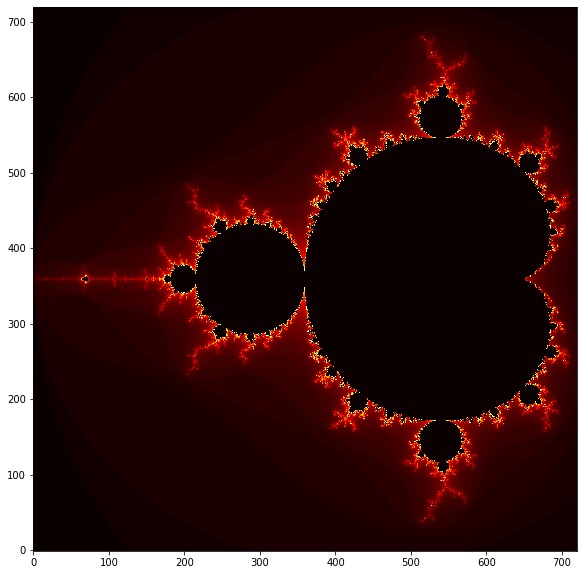

In [25]:
# Program modified from from JeanFrancoisPuget, availible:
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en

import numpy as np # We will use arrays from numpy???? 
from matplotlib import pyplot as plt # not turtle this time!
from matplotlib import colors # I'm tired of black and white, why not some colors?

# This function takes in a complex number c and iterates for
# n from 0 to maxiter to see if z_n > 2. If it does not,
# 0 is returned, and the point is in the Mandelbrot set. If it 
# does, the n where it becomes greater than 2 is stored to add 
# color later on. See description above for more details.
def Mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

# This function loops over points in the xy-plane, checking 
# whether c=x+iy is in the Madelbrot set or not using the 
# function above
def Mandelbrot_Set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width) # x points
    r2 = np.linspace(ymin, ymax, height) # y points
    n3 = np.empty((width,height)) # in set, or n where z > 2 
    for i in range(width):
        for j in range(height):
            # Python has a built in capability for complex numbers
            # The imaginary unit is written as "1j"
            n3[i,j] = Mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)
 
# This function creates an image from the xy data of whether the
# point is in the Madelbrot set, or the n at which it becomes 
# larger than 2
def Mandelbrot_Image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = Mandelbrot_Set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

#-------


# Set a cool looking color map, and give a size for the figure!
Mandelbrot_Image(-2.0,0.5,-1.25,1.25,cmap='hot')    


A bit more complex of a program, but worth it, the coolest picture yet! The recursiveness is not so obvious, but is still there via the Madndelbrot function.

But it gets even better. There is a related set called the ***Julia set***, which is related to the Mandelbrot set, but has some more flexibility for variations. We do basically the same as for the Mandelbrot set, except we *fix* $c$, and plot the real and imaginary parts of $z$. This gives a new design for each $c$. We slightly modify the code from above and try a few complex numbers for $c$.

#### $c=-0.8 + 0.156i$

<img src="julia_m0.8_0.156.png" width="500">

#### $c=-0.7269 + 0.1889i$

<img src="julia_m0.7269_0.1889.png" width="500">

#### $c=-0.70176 - 0.3842i$

<img src="julia_m0.70176 _m0.3842.png" width="500">

Looks like some galactic nebulae, right? There are infinite variations of Julia sets, and you will play around with this in the exercises.

## Summary and conclusions

So what was the point of all of this? Well, for one thing, we generated a lot of awesome looking patterns. Also, as was hinted at, there is complex and deep mathematics that underly these patterns. Even so, the code to generate them is quite simple; a few simple rules and maybe some randomness results in structural richness that resembles patterns that we see in nature.

These are just a few simple examples, and there are many more. In physics length scales are a fundamental concept. Differnt physical effects become relevant at different scales; for example, objects very far apart like planets interact via gravitation, whereas objects close to each other like atoms interact via electromagnetism. Thus situations where things look the same at *all* scales have exotic interactions.

And if you are not interested in philosophical or physical musings, at least we generated a lot of awesome-looking patterns!

# Exercises:

Lets play around with the fractals that we just learned about. The first rule of fractals is whoever makes the coolest picture wins!

## Koch snowflake

Modify the Koch curve code to make a "Koch snowflake" like this one:

<img src="Koch_snowflake.png" width="500">

Can you come up with any other cool patterns that are a variation of the Koch curve? Maybe multiple Koch snowflakes inside of each other?

In [17]:
# Your solution

## Fractal tree

Play around with the fractal tree code to try to make the coolest or most realistic looking tree you can. 

In [ ]:
# Your solution

## Julia sets

Modify the code for the Mandelbrot set to create Julia sets like the ones in the figures above. Remember, we need to fix $c$, and make $r1$ and $r2$ correspond to the real and imaginary parts of $z$ (not $c$). The changes to the Madelbrot code should be minor.


Try different real and imaginary parts of $c$ to get different designs. Also, feel free to play around with the color maps (cmap variable) to get even wilder pictures, see:

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

for a list of possibilities. 

Example solution:

In [1]:
# Your solution